# 고객 이탈 예측 실습 과제

이 노트북은 통신사 고객 이탈 예측 문제를 해결하기 위한 머신러닝 실습 과제입니다.  
의사결정트리(Decision Tree)와 서포트 벡터 머신(SVM)을 활용하며, 의사결정트리는 시각화도 함께 진행합니다.

---

## 📂 데이터셋 다운로드 방법
1. [Kaggle Telco Customer Churn Dataset 링크](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)에 접속합니다.
2. `Download` 버튼을 클릭해 데이터셋을 내려받습니다.
3. 압축을 해제하고 `WA_Fn-UseC_-Telco-Customer-Churn.csv` 파일을 현재 노트북과 같은 폴더에 둡니다.

---

## 🧪 실습 과제 목록


### 🧩 1. 데이터 불러오기 및 확인
- `WA_Fn-UseC_-Telco-Customer-Churn.csv` 파일을 불러오고 `head()`로 데이터를 확인하세요.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# 1. 데이터 불러오기 및 확인
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())
print(df.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

### 🧩 2. 데이터 전처리
- TotalCharges가 문자열로 되어 있는 문제를 해결하고, 결측값을 처리하세요.
- `Churn` 컬럼을 0과 1로 변환하고, `customerID` 컬럼을 제거하세요.
- 범주형 변수들을 원핫 인코딩 처리하세요.
- 훈련용과 테스트용 데이터로 7:3 비율로 분리하세요.

In [24]:
# 2. 데이터 전처리
# TotalCharges 문자열 -> 숫자 변환 및 결측값 처리
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Churn 컬럼 0,1로 변환
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# customerID 컬럼 제거 (컬럼 존재 여부 확인 후 제거)
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# 범주형 변수 인코딩
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# 피처와 타겟 분리
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn'] 

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # fit_transform -> transform으로 수정

### 🧩 3. 의사결정트리 모델링 및 시각화
- `DecisionTreeClassifier`를 사용하여 훈련 데이터를 학습하세요.
- `plot_tree()`를 사용하여 트리를 시각화하세요.
- 주요 분기 기준을 해석해보세요.

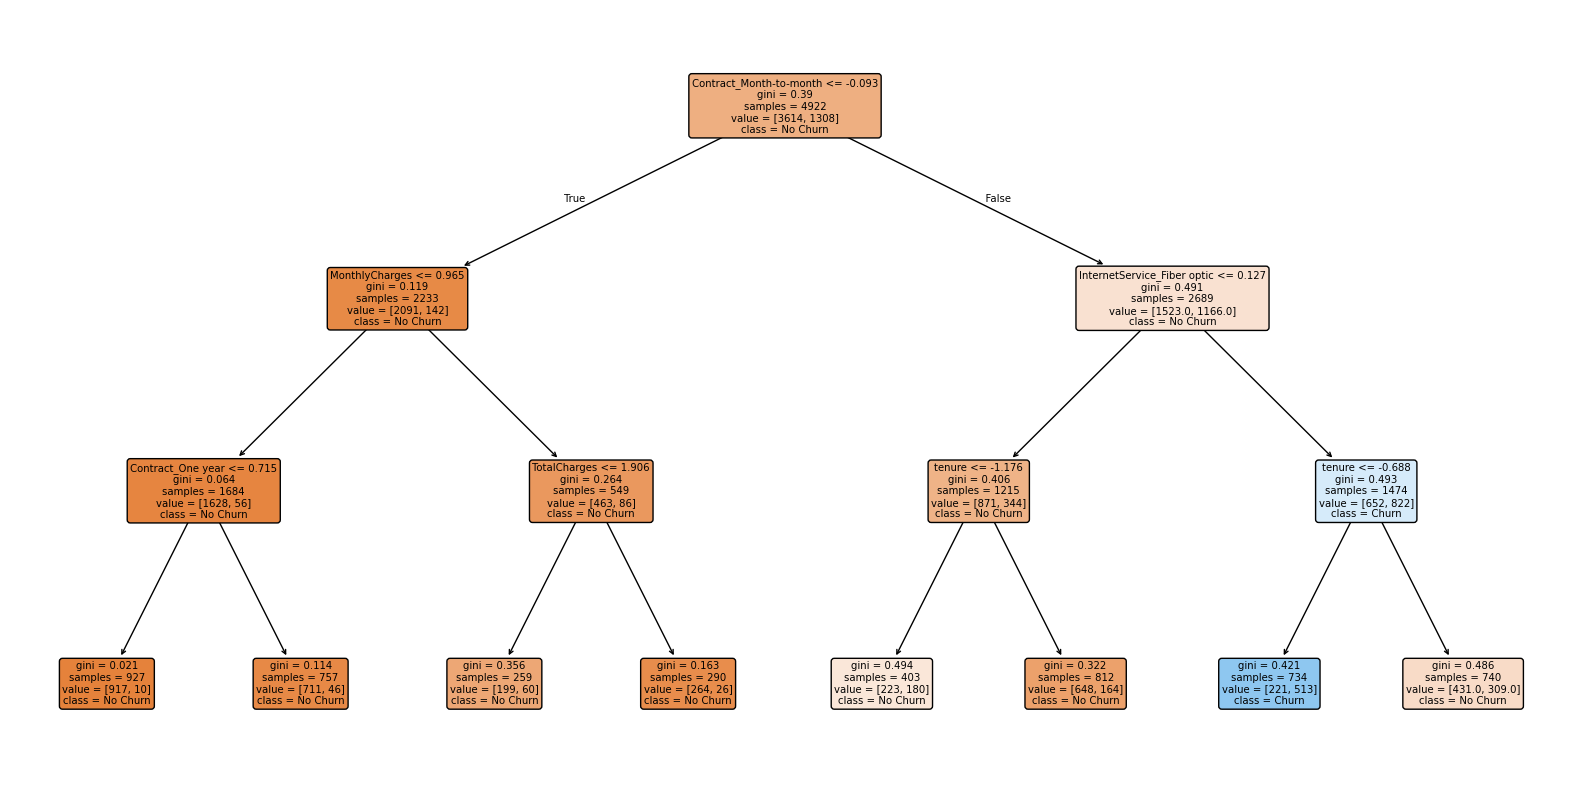

In [25]:
# 3. 의사결정트리 모델링 및 시각화
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=3)
dt_classifier.fit(X_train_scaled, y_train)

#트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['No Churn', 'Churn'], filled=True, rounded=True)
plt.show()

### 🧩 4. SVM 모델링
- `SVC` 모델을 이용해 이탈 여부를 예측하세요.
- 테스트셋에 대한 예측 결과를 출력하고, `classification_report`를 사용해 평가하세요.

In [30]:
# 4. SVM 모델링
svm_classifier = SVC(kernel='rbf' ,random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

#SVM 성능평가
svm_pred = svm_classifier.predict(X_test_scaled)
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_pred))

# 의사결정트리 예측
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)
dt_pred = dt_classifier.predict(X_test_scaled)


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



### 🧩 5. 모델 성능 비교
- 의사결정트리와 SVM의 평가 지표(`정확도`, `정밀도`, `재현율`)를 비교하세요.
- 어떤 모델이 어떤 상황에서 더 적합한지 분석해보세요.

In [34]:
#5 모델 성능 비교
print("\n모델 성능 비교")
print("Decision Tree 정확도:", accuracy_score(y_test, dt_pred))
print("SVM 정확도: ", accuracy_score(y_test, svm_pred))


모델 성능 비교
Decision Tree 정확도: 0.7327014218009479
SVM 정확도:  0.7938388625592417


### 🧩 6. 사용자 입력 기반 예측 (선택)
- 새로운 고객의 정보를 입력받아 모델이 이탈 가능성을 예측하도록 구성해보세요.

In [39]:
def predict_churn(model, scaler, X):
    # 숫자형 특성 입력
    numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_features = {}
    
    # 숫자형 특성 입력
    for feature in numeric_features:
        while True:
            try:
                input_features[feature] = float(input(f"{feature} 입력 (예시 범위): "))
                break
            except ValueError:
                print("숫자를 정확히 입력해주세요.")
    
    # 범주형 특성 입력
    categorical_features = {
        'Contract': ['Month-to-month', 'One year', 'Two year'],
        'InternetService': ['DSL', 'Fiber optic', 'No'],
        'PaymentMethod': ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
    }
    
    for feature, values in categorical_features.items():
        print(f"\n{feature} 선택:")
        for i, value in enumerate(values, 1):
            print(f"{i}. {value}")
        
        while True:
            try:
                choice = int(input("번호 선택: "))
                if 1 <= choice <= len(values):
                    selected_value = values[choice-1]
                    break
                else:
                    print("올바른 번호를 선택해주세요.")
            except ValueError:
                print("숫자를 입력해주세요.")
        
        # 원핫 인코딩된 컬럼에 대한 처리
        for val in values:
            col_name = f"{feature}_{val}"
            input_features[col_name] = 1 if val == selected_value else 0
    
    # 추가 범주형 변수들도 비슷한 방식으로 처리 가능
    # 예: gender, SeniorCitizen 등
    
    # 입력 데이터 변환 및 예측
    try:
        input_df = pd.DataFrame([input_features])
        
        # X의 모든 컬럼 순서에 맞추기
        input_df = input_df.reindex(columns=X.columns, fill_value=0)
        
        # 스케일링 및 예측
        input_scaled = scaler.transform(input_df)
        prediction = model.predict(input_scaled)
        
        # 결과 출력
        print("\n이탈 예측 결과:")
        if prediction[0] == 1:
            print("🚨 고객 이탈 가능성 높음!")
            print("추가 관리와 유지 전략이 필요합니다.")
        else:
            print("✅ 고객 이탈 가능성 낮음")
            print("현재 서비스 유지 중")
    
    except Exception as e:
        print("예측 중 오류 발생:", str(e))

# 모델과 스케일러를 사용해 예측
predict_churn(svm_classifier, scaler, X)


Contract 선택:
1. Month-to-month
2. One year
3. Two year

InternetService 선택:
1. DSL
2. Fiber optic
3. No

PaymentMethod 선택:
1. Electronic check
2. Mailed check
3. Bank transfer (automatic)
4. Credit card (automatic)

이탈 예측 결과:
✅ 고객 이탈 가능성 낮음
현재 서비스 유지 중


# 부록: 의사결정트리 시각화 예제(iris dataset)

In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

In [ ]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

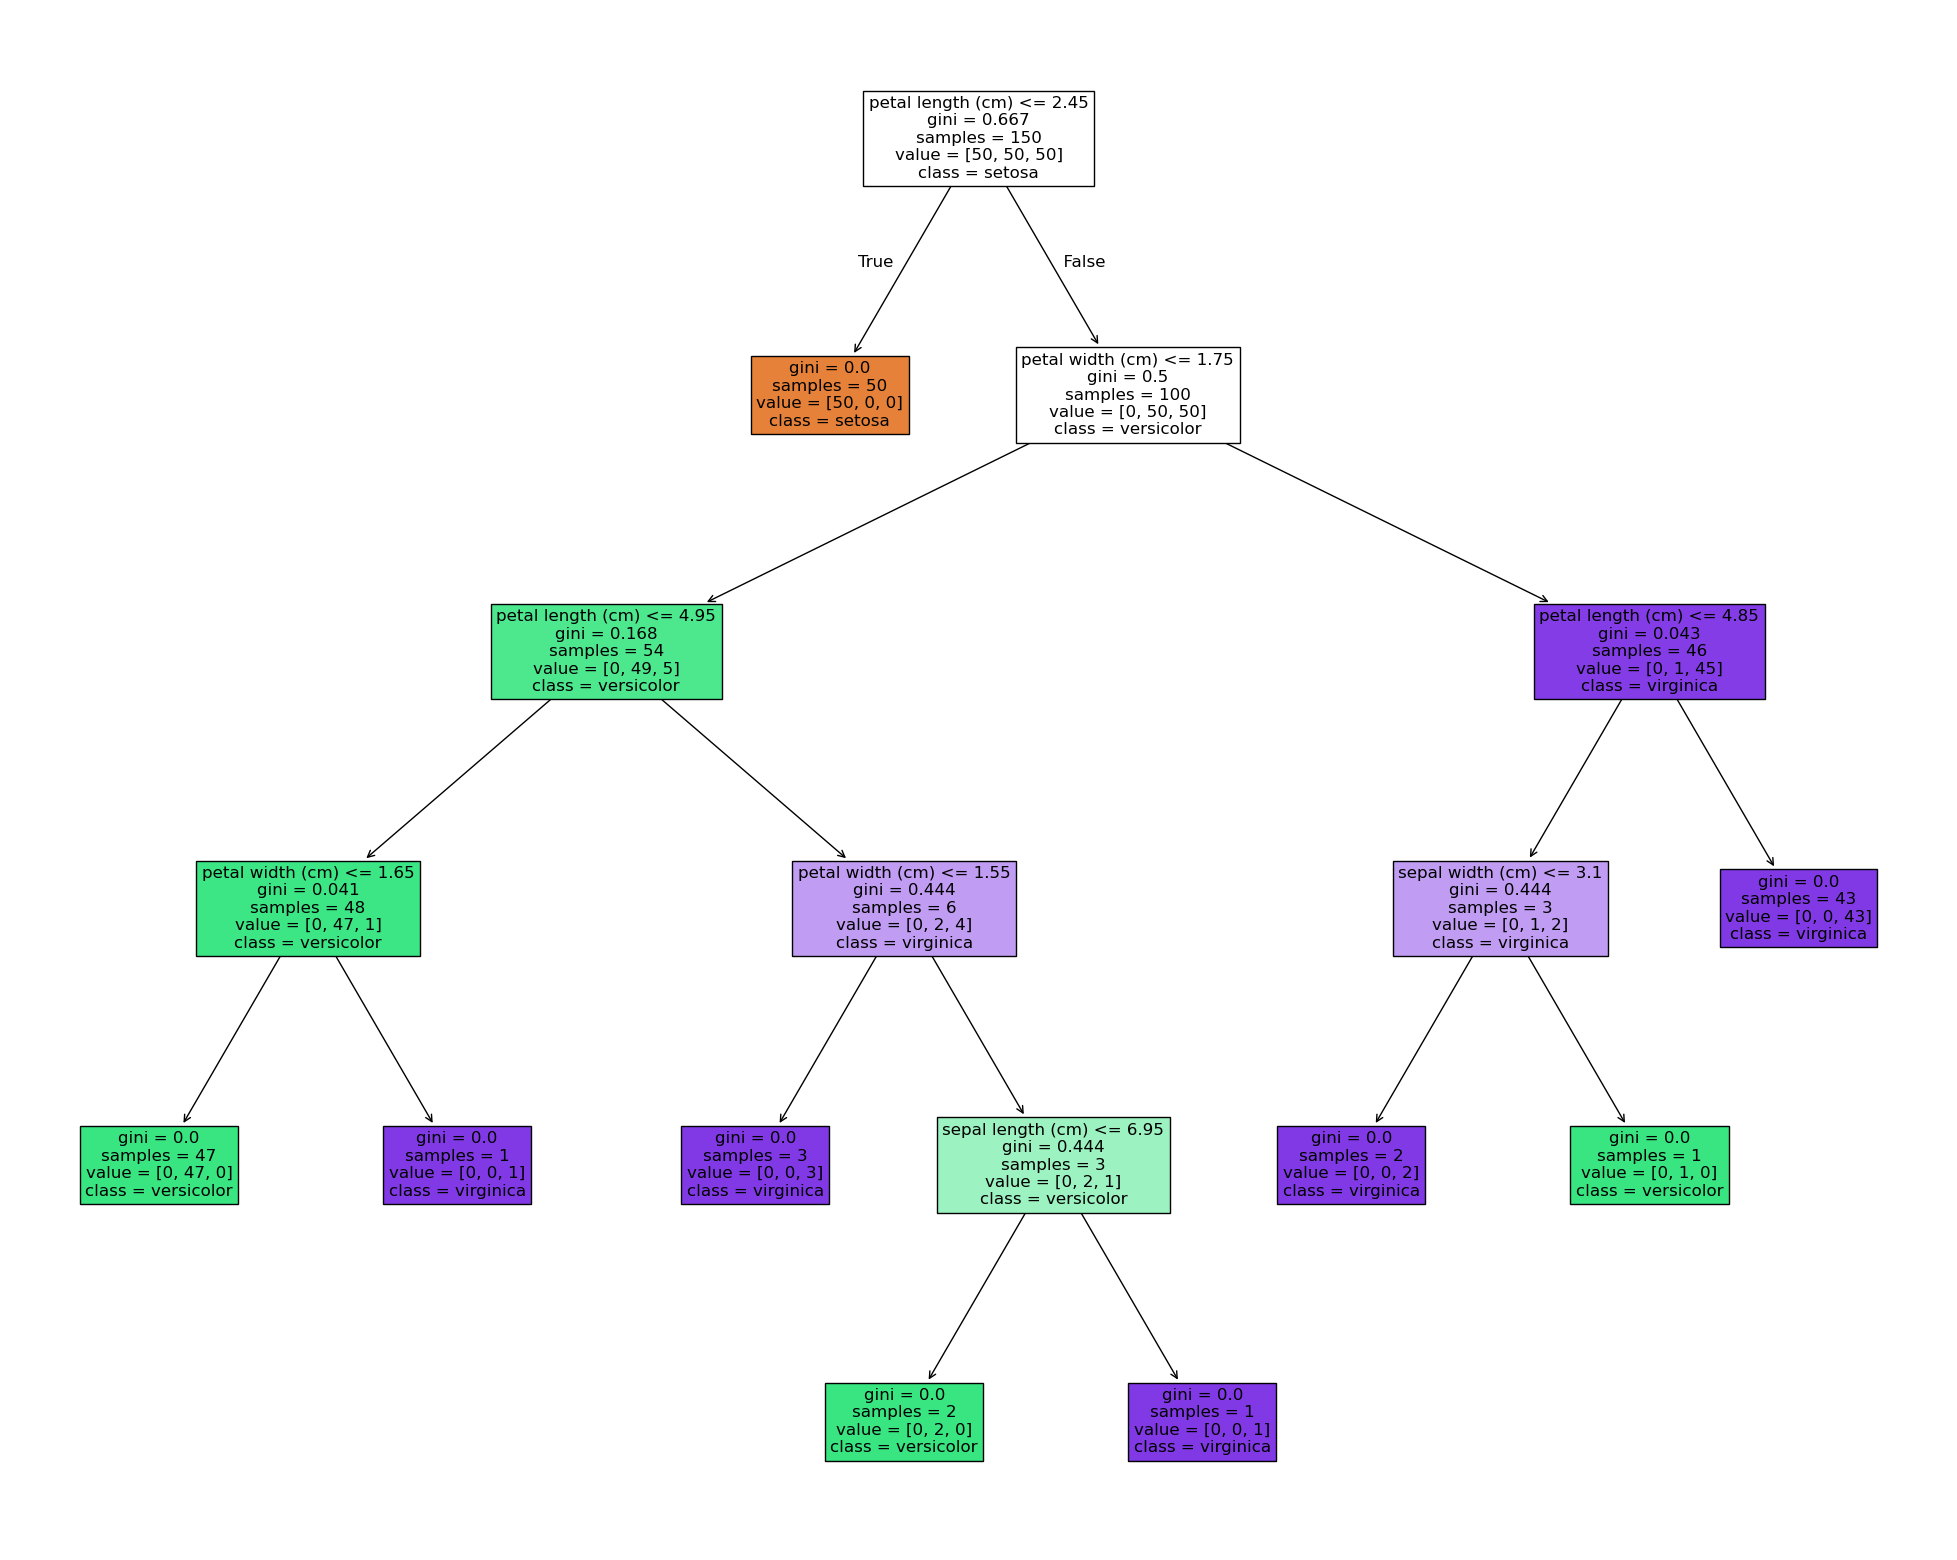

In [6]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True,
                   fontsize=12)